![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/UBA.svg/240px-UBA.svg.png)

<h1 style="text-align:center;">Trabajo Practico Metodología de análisis en opinión pública</h1>

<h2>Estudio realizado para "Juntos por el cambio", evaluacion de desempeño en las <b>Paso 2019</b></h2>

<h4>Integrantes:</br></br><ul><li>García, Rocío</li><li>Gonzalez Dorfman, Santiago</li><li>Larrea, Josefina</li><li>Fuchs, Tomás</li></ul>

<p>Hipotesis:</br>
    <em>Visualizar en quantiles los datos de las elecciones realizadas el domingo 11 de Agosto para poder observar donde se dieron los peores resultados de la formula partido para visualizar donde es necesario mejorar el desempeño.</em></p> 

In [78]:
import pandas as pd
pd.options.display.max_rows=5
pd.options.display.max_columns=6
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set(rc={'figure.figsize':(11.7,8.28)})

In [79]:
try:
    os.chdir(os.path.join(os.getcwd(), '../../'))
except:
    pass

In [80]:
PASO19 = pd.read_csv (r'/Users/tomasfuchs/met4op/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv')
PASO19

,CODIGO_DISTRITO,CODIGO_SECCION,CODIGO_CIRCUITO,...,NOMBRE_CATEGORIA,NOMBRE_REGION,NOMBRE_AGRUPACION
0,1,1001,1001000001,...,Presidente y Vicepresidente de la República,COMUNA 01,MOVIMIENTO AL SOCIALISMO
1,1,1001,1001000001,...,Presidente y Vicepresidente de la República,COMUNA 01,FRENTE NOS
...,...,...,...,...,...,...,...
616676,1,1015,1015000167,...,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,NULO
616677,1,1015,1015000167,...,Junta Comunal Ciudad Autónoma de Buenos Aires ...,COMUNA 15,RECURRIDO


In [34]:
PASO19 = (
    PASO19.loc[PASO19.CODIGO_CATEGORIA == 100000000000]
    .filter(["NOMBRE_AGRUPACION", "VOTOS_AGRUPACION","NOMBRE_REGION", "CODIGO_CIRCUITO", "CODIGO_MESA"])
    .pivot_table(
        values='VOTOS_AGRUPACION',
        index=['NOMBRE_REGION',"CODIGO_CIRCUITO","CODIGO_MESA"],
        columns=["NOMBRE_AGRUPACION"])
    )

PASO19.reset_index(level=['NOMBRE_REGION',"CODIGO_CIRCUITO","CODIGO_MESA"], inplace=True)
PASO19 = PASO19.loc[(PASO19["JUNTOS POR EL CAMBIO"] + PASO19["JUNTOS POR EL CAMBIO"]) > 0]
PASO19 = PASO19.rename_axis('index')

PASO19

NOMBRE_AGRUPACION,NOMBRE_REGION,CODIGO_CIRCUITO,CODIGO_MESA,...,PARTIDO AUTONOMISTA,RECURRIDO,UNITE POR LA LIBERTAD Y LA DIGNIDAD
index,,,,,,,
0,COMUNA 01,1001000001,0100100001X,...,0,0,4
1,COMUNA 01,1001000001,0100100002X,...,0,0,9
...,...,...,...,...,...,...,...
7407,COMUNA 15,1015000167,0101507412X,...,0,0,10
7408,COMUNA 15,1015000167,0101507413X,...,2,0,10


In [ ]:
PREVIOPASO19 = pd.read_csv (r'/Users/tomasfuchs/met4op/dataset/elecciones_2019/resultados/120819-054029/datos_agrup.csv')

In [81]:
df_in = PREVIOPASO19
JUNTOS19 = (
    df_in
    .loc[ df_in.NOMBRE_AGRUPACION.isin(['JUNTOS POR EL CAMBIO']), ['NOMBRE_AGRUPACION','NOMBRE_CATEGORIA','VOTOS_AGRUPACION','NOMBRE_REGION']]
    .groupby(['NOMBRE_AGRUPACION','NOMBRE_REGION','NOMBRE_CATEGORIA'])
    .describe()
)
JUNTOS19

VOTOS_AGRUPACION  \
                                                                                                 count   
NOMBRE_AGRUPACION    NOMBRE_REGION NOMBRE_CATEGORIA                                                      
JUNTOS POR EL CAMBIO COMUNA 01     Diputados Ciudad Autónoma de Buenos Aires                     522.0   
                                   Diputados Nacionales Ciudad Autónoma de Buenos ...            517.0   
...                                                                                                ...   
                     COMUNA 15     Presidente y Vicepresidente de la República                   483.0   
                                   Senadores Nacionales Ciudad Autónoma de Buenos ...            483.0   

                                                                                                   \
                                                                                             mean   
NOMBRE_AGRUPACION    NOMBRE_REGION NOMBRE_CATEGORIA                                                 
JUNTOS POR EL CAMBIO COMUNA 01     Diputados Ciudad Autónoma de Buenos Aires           105.178161   
                                   Diputados Nacionales Ciudad Autónoma de Buenos ...  104.903288   
...                                                                                           ...   
                     COMUNA 15     Presidente y Vicepresidente de la República         104.231884   
                                   Senadores Nacionales Ciudad Autónoma de Buenos ...  107.229814   

                                                                                                  \
                                                                                             std   
NOMBRE_AGRUPACION    NOMBRE_REGION NOMBRE_CATEGORIA                                                
JUNTOS POR EL CAMBIO COMUNA 01     Diputados Ciudad Autónoma de Buenos Aires           39.230370   
                                   Diputados Nacionales Ciudad Autónoma de Buenos ...  38.384104   
...                                                                                          ...   
                     COMUNA 15     Presidente y Vicepresidente de la República         15.323079   
                                   Senadores Nacionales Ciudad Autónoma de Buenos ...  15.800985   

                                                                                       ...  \
                                                                                       ...   
NOMBRE_AGRUPACION    NOMBRE_REGION NOMBRE_CATEGORIA                                    ...   
JUNTOS POR EL CAMBIO COMUNA 01     Diputados Ciudad Autónoma de Buenos Aires           ...   
                                   Diputados Nacionales Ciudad Autónoma de Buenos ...  ...   
...                                                                                    ...   
                     COMUNA 15     Presidente y Vicepresidente de la República         ...   
                                   Senadores Nacionales Ciudad Autónoma de Buenos ...  ...   

                                                                                              \
                                                                                         50%   
NOMBRE_AGRUPACION    NOMBRE_REGION NOMBRE_CATEGORIA                                            
JUNTOS POR EL CAMBIO COMUNA 01     Diputados Ciudad Autónoma de Buenos Aires            99.0   
                                   Diputados Nacionales Ciudad Autónoma de Buenos ...   99.0   
...                                                                                      ...   
                     COMUNA 15     Presidente y Vicepresidente de la República         105.0   
                                   Senadores Nacionales Ciudad Autónoma de Buenos ...  107.0   

                                                                                              \
         

In [83]:
comuna_agrupacion = PREVIOPASO19.groupby(['NOMBRE_REGION','NOMBRE_AGRUPACION']).agg({'VOTOS_AGRUPACION': 'sum'})
comunas = PREVIOPASO19.groupby('NOMBRE_REGION').agg({'VOTOS_AGRUPACION': 'sum'})

In [84]:
porcentajes_partidos_por_comuna = comuna_agrupacion.div(comunas,level='NOMBRE_REGION')*100
JUNTOS19 = PREVIOPASO19.loc[ PREVIOPASO19.NOMBRE_AGRUPACION.isin(['JUNTOS POR EL CAMBIO']), ['VOTOS_AGRUPACION','NOMBRE_REGION']].groupby('NOMBRE_REGION').agg({'VOTOS_AGRUPACION': 'sum'})
porcentajes_juntos_por_el_cambio_por_comuna = JUNTOS19.div(comunas,level='NOMBRE_REGION')*100

In [85]:
porcentajes_partidos_por_comuna

VOTOS_AGRUPACION
NOMBRE_REGION NOMBRE_AGRUPACION                                    
COMUNA 01     AUTODETERMINACION Y LIBERTAD                 0.765576
              BLANCO                                       5.824329
...                                                             ...
COMUNA 15     RECURRIDO                                    0.044866
              UNITE POR LA LIBERTAD Y LA DIGNIDAD          2.705134

[300 rows x 1 columns]

<h3>Grafico de Resultados Electorales PASO 19</h3>

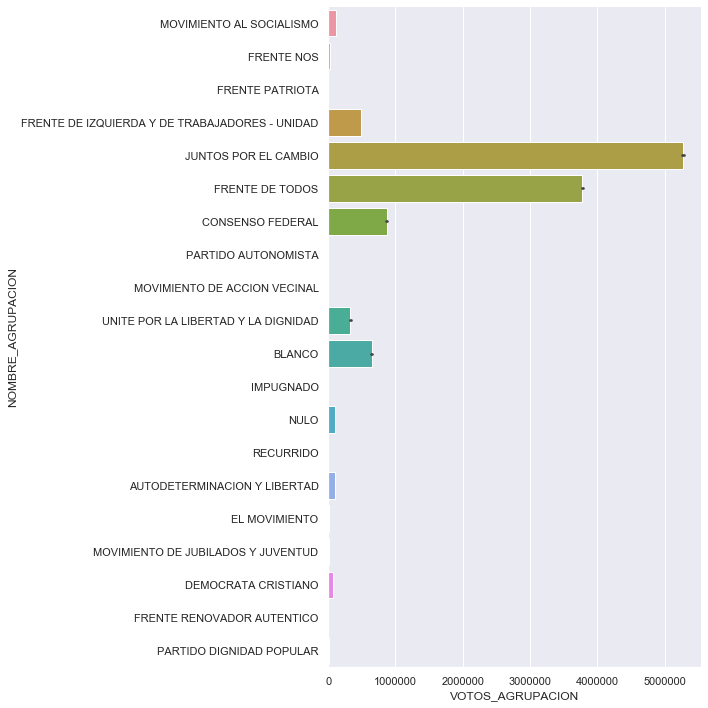

In [118]:
sns.catplot(
    x="VOTOS_AGRUPACION",
    y="NOMBRE_AGRUPACION",
    data=PREVIOPASO19,
    kind='bar',
    estimator=np.sum,
    height=10,
    aspect=1
)

In [100]:
df_in = PREVIOPASO19
JUNTOS19_TotalesVSAgrupacion = (
    df_in
    .assign(Total=df_in.groupby(['NOMBRE_REGION','CODIGO_MESA','NOMBRE_CATEGORIA']).VOTOS_AGRUPACION.transform('sum'))
    .loc[ PREVIOPASO19.NOMBRE_AGRUPACION.isin(['JUNTOS POR EL CAMBIO']), ['CODIGO_MESA','NOMBRE_AGRUPACION','NOMBRE_CATEGORIA','VOTOS_AGRUPACION','NOMBRE_REGION','Total']]
)
JUNTOS19_TotalesVSAgrupacion

,CODIGO_MESA,NOMBRE_AGRUPACION,NOMBRE_CATEGORIA,VOTOS_AGRUPACION,NOMBRE_REGION,Total
4,0100100001X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,85,COMUNA 01,240
18,0100100002X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,89,COMUNA 01,236
...,...,...,...,...,...,...
616657,0101507412X,JUNTOS POR EL CAMBIO,Junta Comunal Ciudad Autónoma de Buenos Aires ...,132,COMUNA 15,383
616669,0101507413X,JUNTOS POR EL CAMBIO,Junta Comunal Ciudad Autónoma de Buenos Aires ...,125,COMUNA 15,374


In [102]:
JUNTOS19_TotalesVSAgrupacion['Porcentaje'] = (JUNTOS19_TotalesVSAgrupacion['VOTOS_AGRUPACION'] / JUNTOS19_TotalesVSAgrupacion['Total']) * 100
JUNTOS19 = JUNTOS19_TotalesVSAgrupacion[JUNTOS19_TotalesVSAgrupacion.Porcentaje.notnull()].sort_values(['Total', 'Porcentaje'])
JUNTOS19

,CODIGO_MESA,NOMBRE_AGRUPACION,NOMBRE_CATEGORIA,...,NOMBRE_REGION,Total,Porcentaje
347273,0100200534X,JUNTOS POR EL CAMBIO,Jefe de Gobierno Ciudad Autónoma de Buenos Aires,...,COMUNA 02,6,0.000000
540130,0100200534X,JUNTOS POR EL CAMBIO,Junta Comunal Ciudad Autónoma de Buenos Aires ...,...,COMUNA 02,13,0.000000
...,...,...,...,...,...,...,...
550121,0100401507X,JUNTOS POR EL CAMBIO,Junta Comunal Ciudad Autónoma de Buenos Aires ...,...,COMUNA 04,452,5.973451
550301,0100401522X,JUNTOS POR EL CAMBIO,Junta Comunal Ciudad Autónoma de Buenos Aires ...,...,COMUNA 04,460,7.608696


<p>Del total de votos que tuvo <b>Juntos Por el Cambio</b> buscamos ver las mesas donde peor desempeño tuvo ordenadas por el total de votos que se juegan en dicha urna.</p>

In [108]:
MESASATRABAJAR = JUNTOS19[JUNTOS19.NOMBRE_CATEGORIA == 'Presidente y Vicepresidente de la República'].sort_values(['Total', 'Porcentaje'], ascending=False).head(10)

In [114]:
MESASATRABAJAR

,CODIGO_MESA,NOMBRE_AGRUPACION,NOMBRE_CATEGORIA,...,NOMBRE_REGION,Total,Porcentaje
87350,0101306244X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,...,COMUNA 13,341,35.777126
57684,0100904122X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,...,COMUNA 09,341,35.190616
...,...,...,...,...,...,...,...
52280,0100803736X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,...,COMUNA 08,315,26.031746
68996,0101104932X,JUNTOS POR EL CAMBIO,Presidente y Vicepresidente de la República,...,COMUNA 11,309,46.278317


En el siguiente cuadro mostramos las 10 mesas donde peor desempeño tuvo graficadas por el total de votos que se juegan en dicha urna. 

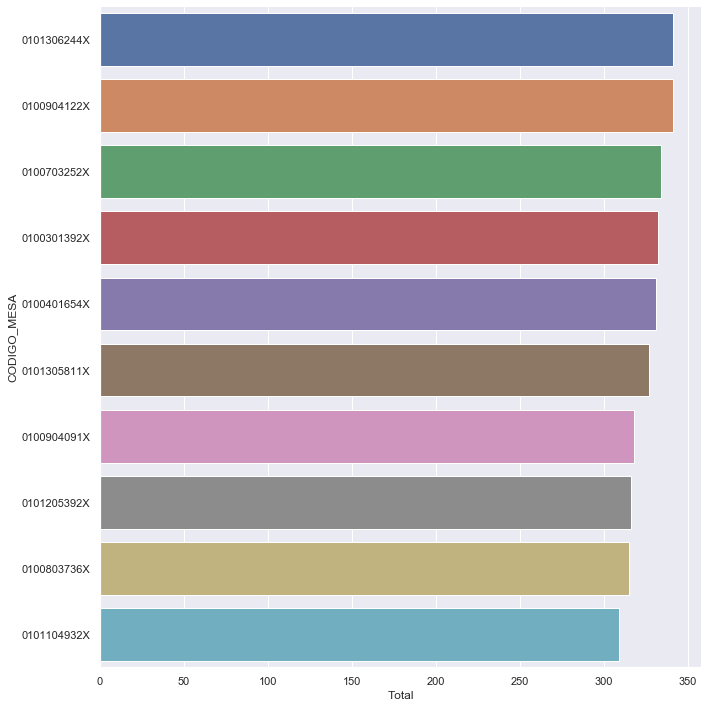

In [115]:
sns.catplot(
    x="Total",
    y="CODIGO_MESA",
    data=MESASATRABAJAR,
    kind='bar',
    estimator=np.sum,
    height=10,
    aspect=1
)

Tomando en cuenta el grafico previo agregamos este grafico donde mostramos las mismas mesas pero expresadas en porcentaje para comparar el desempeño de <b>Juntos Por El Cambio</b> en ellas.

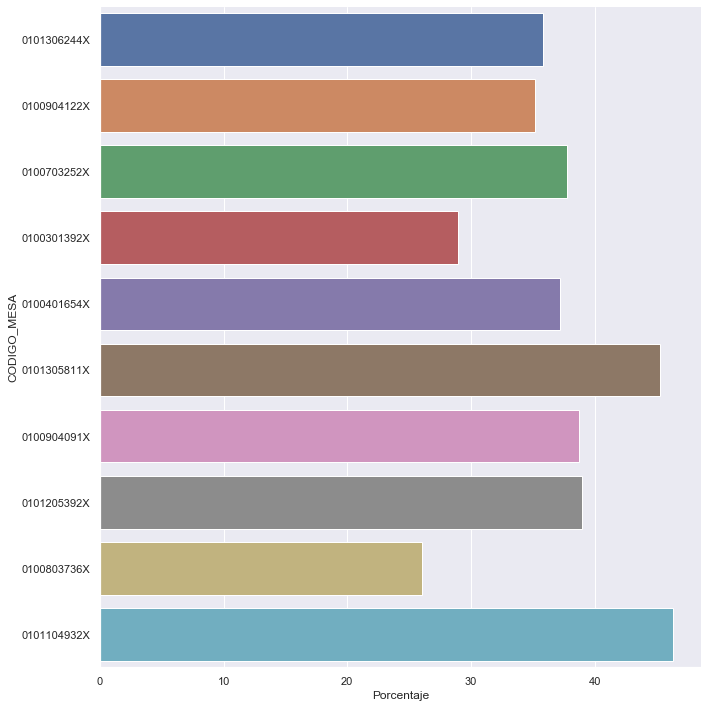

In [116]:
sns.catplot(
    x="Porcentaje",
    y="CODIGO_MESA",
    data=MESASATRABAJAR,
    kind='bar',
    estimator=np.sum,
    height=10,
    aspect=1
)

In [74]:
sns.heatmap(PREVIOPASO19
            .filter(["JUNTOS POR EL CAMBIO","NOMBRE_REGION","NOMBRE_CATEGORIA"])
            .groupby("NOMBRE_REGION")
            .sum()
            , annot=True,
            cmap='YlGnBu'
           )

KeyboardInterrupt: 